# Setup

In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [2]:
# Add directory above current directory to path
import sys

sys.path.insert(0, '..')

In [4]:
import json
import glob
from utils.metrics import extract_metrics_config, Metric

2023-06-15 14:45:31.600094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-15 14:45:31.600131: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
file_list = glob.glob('./experiments/configs/*mscoco*.json')

configs = [json.load(open(file)) for file in file_list]

In [6]:
# add prefix to path

for config in configs:
    config["model"]["training"][
        "log_dir"] = "experiments/" + config["model"]["training"]["log_dir"]

# Load metrics

In [7]:
metrics = [Metric(**extract_metrics_config(config)) for config in configs]

# ROC Curve

[[<matplotlib.lines.Line2D at 0x1484d13a1e80>],

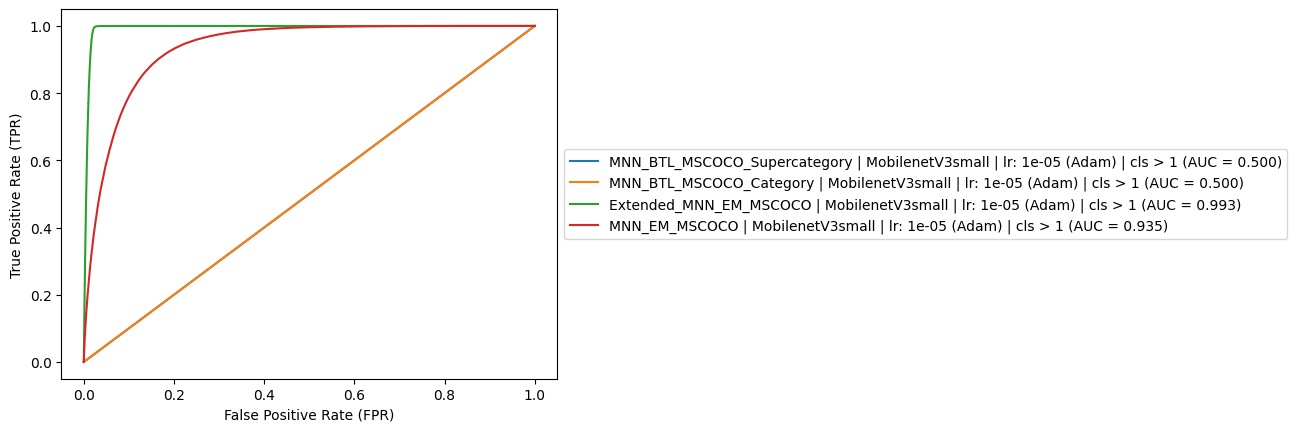

In [8]:
[metric.plot_roc() for metric in metrics]

# Precision-Recall Curve (PRC)

[[<matplotlib.lines.Line2D at 0x1484cec3b130>],

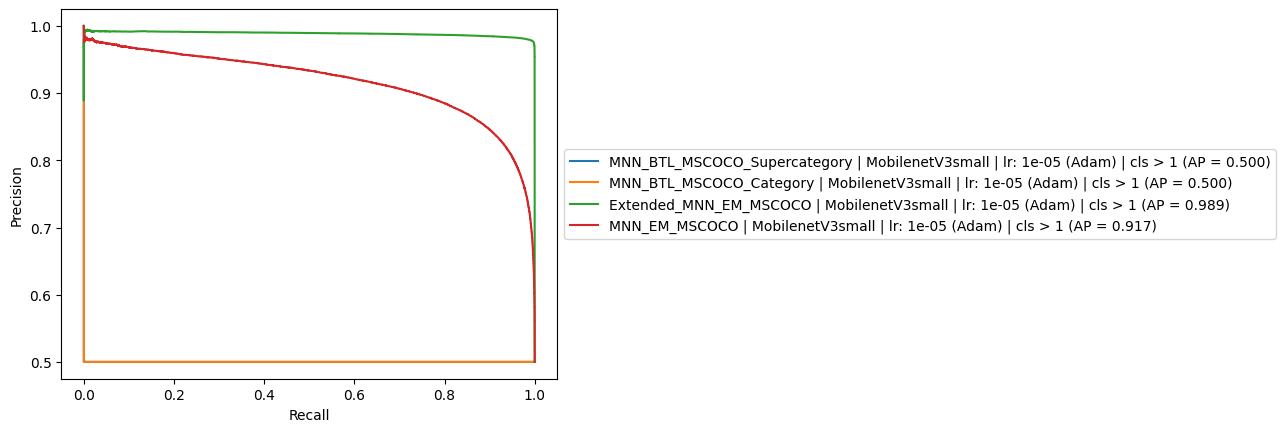

In [9]:
[metric.plot_prc() for metric in metrics]

# Optimal accuracy

The `optimize_threshold()` method calculates and outputs optimal threshold for ROC curve using G-Mean and Youden-Index/J, as well as the optimal threshold for Precision-Recall curve using F-Score.

See also https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [10]:
import pandas as pd

In [11]:
metrics_df = pd.DataFrame.from_dict(
    [metric.optimize_threshold() for metric in metrics])

# select metrics relevant for paper
metrics_df = metrics_df[["Model name", "Image CNN", "lr", "AUC-ROC", "AUC-PRC", "Precision", "Recall", "F-Score", "Threshold F-Score", "Accuracy F-Score"]]
metrics_df[["AUC-ROC", "AUC-PRC", "Precision", "Recall", "F-Score", "Threshold F-Score"]] = metrics_df[["AUC-ROC", "AUC-PRC", "Precision", "Recall", "F-Score", "Threshold F-Score"]].round(4)
metrics_df["Accuracy F-Score"] = metrics_df["Accuracy F-Score"] * 100
metrics_df["Accuracy F-Score"] = metrics_df["Accuracy F-Score"].round(2)
metrics_df["Accuracy F-Score"] = metrics_df["Accuracy F-Score"].astype(str)
metrics_df["Accuracy F-Score"] = metrics_df["Accuracy F-Score"] + " %"

2023-06-15 14:45:37.212274: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-15 14:45:37.212307: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-15 14:45:37.212321: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (uc2n997.localdomain): /proc/driver/nvidia/version does not exist
2023-06-15 14:45:37.213614: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# All models ranked by Accuracy

In [12]:
metrics_df.sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,lr,AUC-ROC,AUC-PRC,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
2,Extended_MNN_EM_MSCOCO,MobilenetV3small,0.00001,0.9934,0.9887,0.9764,0.9968,0.9865,0.8773,98.63 %
3,MNN_EM_MSCOCO,MobilenetV3small,0.00001,0.9347,0.9174,0.8304,0.9234,0.8744,0.2388,86.74 %
0,MNN_BTL_MSCOCO_Supercategory,MobilenetV3small,0.00001,0.5000,0.5000,0.5000,1.0000,0.6667,-0.9997,50.0 %
1,MNN_BTL_MSCOCO_Category,MobilenetV3small,0.00001,0.5000,0.5000,0.5000,1.0000,0.6667,-0.9997,50.0 %


# MNN-EM

In [13]:
metrics_df[metrics_df["Model name"].str.startswith("MNN_EM")].sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,lr,AUC-ROC,AUC-PRC,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
3,MNN_EM_MSCOCO,MobilenetV3small,0.00001,0.9347,0.9174,0.8304,0.9234,0.8744,0.2388,86.74 %


# Extended MNN-EM

In [14]:
metrics_df[metrics_df["Model name"].str.startswith("Extended_MNN_EM")].sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,lr,AUC-ROC,AUC-PRC,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
2,Extended_MNN_EM_MSCOCO,MobilenetV3small,0.00001,0.9934,0.9887,0.9764,0.9968,0.9865,0.8773,98.63 %


# MNN-BTL

In [15]:
metrics_df[metrics_df["Model name"].str.startswith("MNN_BTL")].sort_values(by="Accuracy F-Score", ascending=False)

,Model name,Image CNN,lr,AUC-ROC,AUC-PRC,Precision,Recall,F-Score,Threshold F-Score,Accuracy F-Score
0,MNN_BTL_MSCOCO_Supercategory,MobilenetV3small,0.00001,0.5,0.5,0.5,1.0,0.6667,-0.9997,50.0 %
1,MNN_BTL_MSCOCO_Category,MobilenetV3small,0.00001,0.5,0.5,0.5,1.0,0.6667,-0.9997,50.0 %
